# Weekly Quiz - Data Preprocessing - Kickstarter Projects.

## Problem Statement
Kickstarter is a crowdfunding website where people can ask people to invest in various projects and concept products. They have provided data having different attributes of a project like its name, category, the currency of funding, deadline for crowdfunding, goal and raised amounts for funding, etc.

## Data Description
Attribute information:

- id - project id
- name - project name
- subcategory - project subcategory
- category - project category
- currency - project currency
- deadline - deadline for crowdfunding on Kickstarter
- goal - goal amount in project currency
- launched - launch date on Kickstarter
- pledged - pledged (raised) amount in the project currency
- state - project state
- backers - count of backers
- country - project country
- usd_pledged_real - pledged (raised) amount in USD
- usd_goal_real - goal amount in USD


# 1. Loading libraries

In [26]:
# this will help in making the Python code more structured automatically (good coding practice)
%load_ext nb_black

# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

The nb_black extension is already loaded. To reload it, use:
  %reload_ext nb_black


<IPython.core.display.Javascript object>

### Quiz

**1. Read the data into a pandas dataframe and drop the ‘currency’ and ‘goal’ columns.  
The resulting dataframe contains ___ rows and ___ columns, respectively.**

In [3]:
df = pd.read_csv("./datasets/KickStarterProjects.csv")
df.drop(["currency", "goal"], axis=1, inplace=True)
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")  # f-string

There are 378661 rows and 12 columns.


<IPython.core.display.Javascript object>

**2. The dataframe obtained in Question 1 should be used in the subsequent questions.  
How many columns in the dataset contain missing values?**

In [45]:
df.isnull().sum().sort_values(ascending=False)

name                4
ID                  0
subcategory         0
category            0
deadline            0
launched            0
pledged             0
state               0
backers             0
country             0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

<IPython.core.display.Javascript object>

`name` column has the missing values

**3. If there are any missing values in the dataframe, <span style="text-decoration: underline">drop the rows</span> that contain missing values before moving ahead, and use this dataframe for subsequent questions.  
How many unique project states are there in the data and which among them is the most frequent?**

In [56]:
df.dropna(inplace=True)

<IPython.core.display.Javascript object>

In [58]:
value_counts = df["state"].value_counts(dropna=False)
print(
    f"There are {len(value_counts)} states and the most frequent state is '{value_counts.index[0]}'"
)

There are 6 states and the most frequent state is 'failed'


<IPython.core.display.Javascript object>

**4. Which of the following values (respectively) are the closest approximation of the mean and median number of backers the projects in the dataset have been able to secure?**

In [60]:
print(
    f"The mean value of backers is {df.backers.mean()} and the median value of backers is {df.backers.median()}"
)

The mean value of backers is 105.61854395930882 and the median value of backers is 12.0


<IPython.core.display.Javascript object>

**5. Are there any indications that the number of backers have extreme values?**  

Yes, the mean and median number of backers are starkly different values and this is an indication that this column has outliers.

**6. The goal amount in USD has a highly skewed distribution. Please apply min-max scaling to this column and confirm if that helped in reducing the skewness.  
Note: Create a new scaled column, do not replace the existing column.**

No, and even standard scaling does not help in reducing the skewness

Text(0.5, 1.0, 'usd_goal_real before transformation')

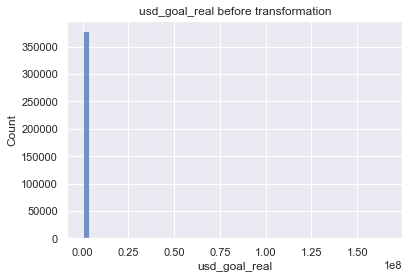

<IPython.core.display.Javascript object>

In [5]:
ax = sns.histplot(df["usd_goal_real"], bins=50)
ax.set_title("usd_goal_real before transformation")

Text(0.5, 1.0, 'usd_goal_real after minmax transformation')

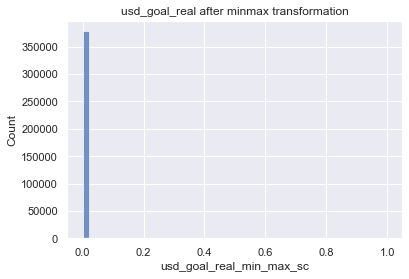

<IPython.core.display.Javascript object>

In [9]:
from sklearn.preprocessing import MinMaxScaler

df["usd_goal_real_min_max_sc"] = MinMaxScaler().fit_transform(df[["usd_goal_real"]])
ax = sns.histplot(df["usd_goal_real_min_max_sc"], bins=50)
ax.set_title("usd_goal_real after minmax transformation")

Text(0.5, 1.0, 'usd_goal_real after z transformation')

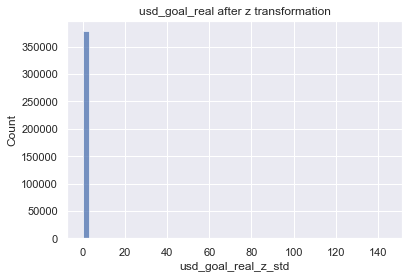

<IPython.core.display.Javascript object>

In [10]:
from sklearn.preprocessing import StandardScaler

df["usd_goal_real_z_std"] = StandardScaler().fit_transform(df[["usd_goal_real"]])
ax = sns.histplot(df["usd_goal_real_z_std"], bins=50)
ax.set_title("usd_goal_real after z transformation")

**7. Which of these plots represent the 'usd_goal_real' column after applying log transformation to this column?**

Text(0.5, 1.0, 'usd_goal_real after ')

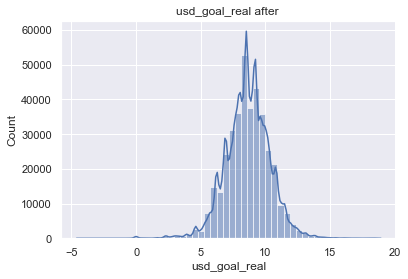

<IPython.core.display.Javascript object>

In [12]:
ax = sns.histplot(np.log(df["usd_goal_real"]), bins=50, kde=True)
ax.set_title("usd_goal_real after ")

**8. In which month was the highest number of projects launched?**

In [13]:
df["launched month"] = pd.to_datetime(df["launched"]).dt.month
df["launched month"].value_counts(dropna=False)

7     34477
1     34347
10    33409
3     32837
11    32135
8     31619
5     31573
9     31538
6     31383
4     31038
2     29876
12    24429
Name: launched month, dtype: int64

<IPython.core.display.Javascript object>

**9. Which of the following project categories has been able to raise the most funds on average?**

In [17]:
cat_mean_series = (
    df.groupby(["category"]).usd_pledged_real.mean().sort_values(ascending=False)
)
print(f"The category with most funds on average is {cat_mean_series.index[0]}")

The category with most funds on average is Design


<IPython.core.display.Javascript object>

**10. Are there any duplicates in the project names?**

Find unique items and subtract it from the total rows (obtained from the shape)

In [20]:
df.shape[0] - df["name"].nunique()

2939

<IPython.core.display.Javascript object>

Another way is use the duplicated() method

In [24]:
df.name.duplicated().sum()

2938

<IPython.core.display.Javascript object>